In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import math

from scipy import stats
%matplotlib inline

### Problem Statement

A company has introduced a new training program aimed at improving employee productivity. To evaluate the effectiveness of this program, the company measures the productivity scores of 300 employees before and after undergoing the training. The goal is to determine if there is a statistically significant increase in productivity scores after the training, using a paired t-test.

Hypotheses:

Null Hypothesis: The mean difference in productivity scores before and after the training is 0 (no effect).

Alternative Hypothesis: The mean difference in productivity scores before and after the training is greater than 0 (training has a positive effect).

In [4]:
np.random.seed(42)
before_training = np.random.normal(50,10,300)
after_training = before_training + np.random.normal(5,2,300)
df_productivity = pd.DataFrame({'Before_Training': before_training, 'After_Training': after_training})
df_productivity.to_csv('employee_productivity.csv', index=False)

In [5]:
df_productivity.head()

,Before_Training,After_Training
0,54.967142,58.309152
1,48.617357,52.496995
2,56.476885,62.971473
3,65.230299,71.451039
4,47.658466,52.616663


In [6]:
df_productivity['Productivity_Changes'] = df_productivity['After_Training'] - df_productivity['Before_Training']

In [9]:
df_productivity.head()

,Before_Training,After_Training,Productivity_Changes
0,54.967142,58.309152,3.342010
1,48.617357,52.496995,3.879638
2,56.476885,62.971473,6.494587
3,65.230299,71.451039,6.220741
4,47.658466,52.616663,4.958197


In [10]:
df_productivity.describe()

,Before_Training,After_Training,Productivity_Changes
count,300.000000,300.000000,300.000000
mean,49.944514,54.901534,4.957020
std,9.841937,9.951341,1.923236
min,17.587327,24.329576,0.056711
25%,43.167541,48.271601,3.591190
50%,50.592195,55.073199,4.962471
75%,56.266577,61.014840,6.232675
max,88.527315,91.865415,11.157762


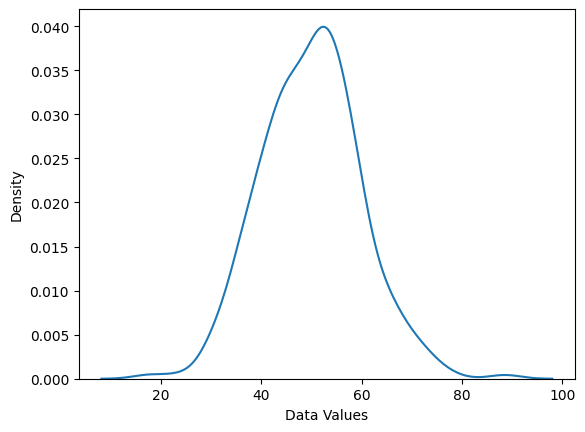

In [11]:
sns.kdeplot(df_productivity['Before_Training'])

plt.xlabel('Data Values')
plt.ylabel('Density')

plt.show()

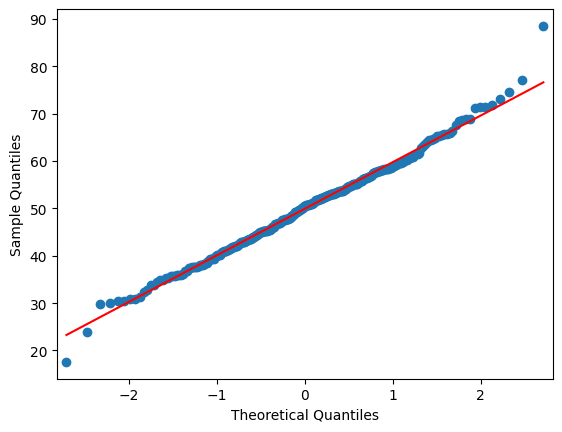

In [12]:
sm.qqplot(df_productivity['Before_Training'], line='s')

plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')

plt.show()

In [13]:
def check_p_val(p_val, alpha):

    if p_val < alpha:
        print('We have evidence to reject the null hypothesis.')
    else:
        print('We do not have evidence to reject the null hypothesis.')

In [14]:
stats, p_val = stats.normaltest(df_productivity['Before_Training'])

In [16]:
print(p_val)
check_p_val(p_val, 0.05)

0.08235666830182627
We do not have evidence to reject the null hypothesis.


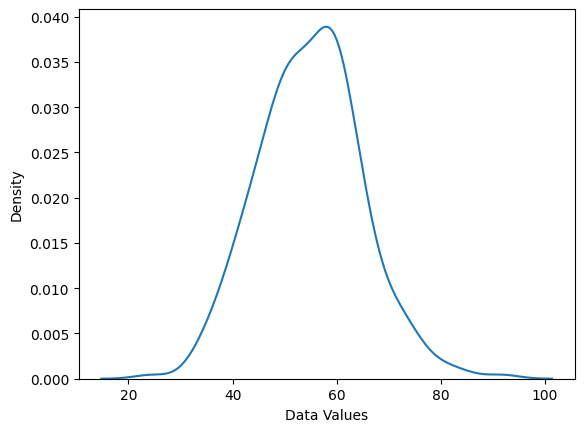

In [17]:
sns.kdeplot(df_productivity['After_Training'])

plt.xlabel('Data Values')
plt.ylabel('Density')

plt.show()

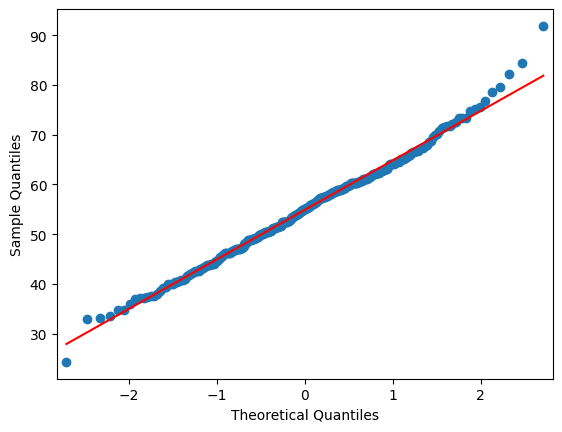

In [18]:
sm.qqplot(df_productivity['After_Training'], line='s')

plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')

plt.show()

In [19]:
def check_p_val(p_val, alpha):

    if p_val < alpha:
        print('We have evidence to reject the null hypothesis.')
    else:
        print('We do not have evidence to reject the null hypothesis.')

In [24]:
statistic, p_val = stats.normaltest(df_productivity['After_Training'])

In [26]:
print(p_val)
check_p_val(p_val, 0.05)

0.10856535726924116
We do not have evidence to reject the null hypothesis.


In [27]:
len(df_productivity)

300

In [29]:
stats.ttest_rel(a=df_productivity['Before_Training'], b=df_productivity['After_Training'])

TtestResult(statistic=-44.64252897832417, pvalue=2.8569392926466395e-134, df=299)

In [30]:
stats.t.ppf(q=0.025, df=299)

-1.9679296690653623

In [31]:
stats.t.ppf(q=0.975, df=299)

1.9679296690653618